In [7]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from utils import bimshow

sys.path.append('../')

%matplotlib inline

# Morphological Image Processing

## Preliminaries

1. The **reflection** of a set $B$ is defined as:

$$\begin{equation}
\hat{B} \triangleq \{ -b | b \in B \}
\end{equation}$$

2. The **translation** of a set $B$ by point $z$ is defined as:

$$\begin{equation}
(B)_z \triangleq \{ b + z | b \in B\}
\end{equation}$$

3. A **Structuring Element** is a small set or a subimage used to probe an image under study for properties of interest.
  * In addition to its elements, its origin must be specified. Otherwise, reflection and translation on it are
  ambiguous.
  * When the SE is symmetric and its origin is the symmetric center, the origin can be omitted.

## Erosion and Dilation

### Dilation

The **dilation** of $A$ by $B$ is defined as:

$$\begin{equation}
A \oplus B \triangleq \{ a + b | a \in A, b \in B\}
\end{equation}$$

That is, the dilation of $A$ by $B$ is just the union of translations of $A$ by every point in $B$, i.e.:

$$\begin{equation}
A \oplus B = \bigcup_{b \in B}(A)_b
\end{equation}$$

Or equivalently, the dilation of $A$ by $B$ is just the union of translations of $B$ by every point in $A$, i.e.:

$$ A \oplus B = \bigcup_{a \in A} (B)_a $$

which can be interpreted as the result that each point in $A$ 'grows' into $B$ (with itself becoming the origin of $B$).

Clearly, dilation is:

* associative: $(A \oplus B) \oplus C = A \oplus (B \oplus C)$
* symmetric: $A \oplus B = B \oplus A$

Moreover, if we denote the set containing the origin alone by $\mathcal{O}$, then we have:

* zero-element: $A \oplus \mathcal{O} = A$

But generally, there is no set $B$ s.t. $A \oplus B = \mathcal{O}$ unless $A = \mathcal{O}$.

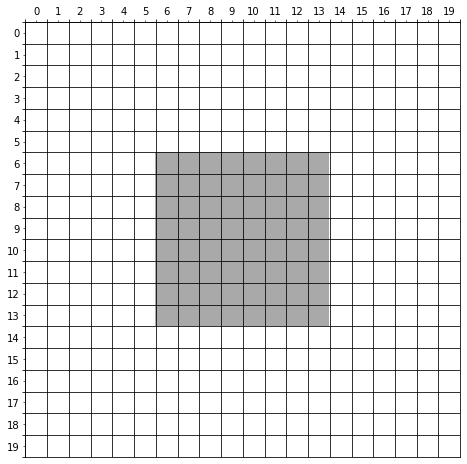

In [22]:
square = np.zeros((20, 20), dtype=np.uint8)
square[6:14, 6:14] = 1

bimshow(square, figsize=(8, 8))
plt.show()

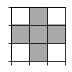

In [27]:
mask = np.ones((3, 3), dtype=np.uint8)
mask[0, 0], mask[2, 0], mask[0, 2], mask[2, 2] = 0, 0, 0, 0

bimshow(mask, ticklabels='off', figsize=(1, 1))

In [12]:
from morphology import bimage2set

In [28]:
mask_set = bimage2set(mask, origin=(1, 1))
mask_set

array([[-1,  0],
       [ 0, -1],
       [ 0,  0],
       [ 0,  1],
       [ 1,  0]])

In [29]:
square_set = bimage2set(square)
square_set.shape

(64, 2)

In [30]:
square_set_ext = np.expand_dims(square_set, axis=0)  # (1, 64, 2)
mask_set_ext = np.expand_dims(mask_set, axis=1)  # (9, 1, 2)

dilation = (square_set_ext + mask_set_ext).reshape((-1, 2))
dilation.shape

(320, 2)

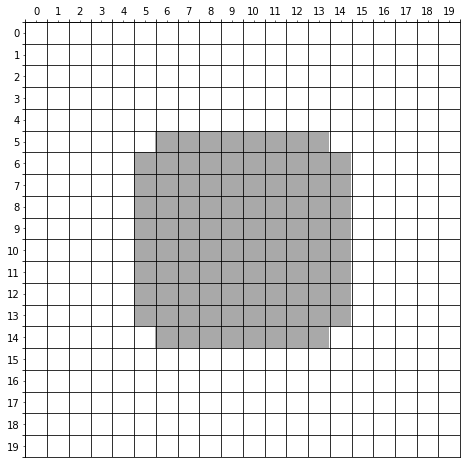

In [31]:
dilated = np.zeros_like(square, dtype=np.uint8)

dilated[dilation[:, 0], dilation[:, 1]] = 1

bimshow(dilated, figsize=(8, 8))

### Erosion

The **erosion** of $A$ by $B$ is defined as:

$$\begin{equation}
A \ominus B \triangleq \{z | (B)_z \subseteq A\}
\end{equation}$$

Similarly, $z$ belongs to $A \ominus B$ iff for any $b \in B$, there is a $a \in A$, s.t. $z = a - b$, that is:

$$\begin{equation}
A \ominus B = \bigcap_{b \in B} \bigcup_{a \in A} \{a - b\} = \bigcap_{b \in B} (A)_{-b}
\end{equation}$$

### Duality

From the duality between cup and cap, it's obvious that:

$$\begin{equation}
\big(A \oplus B\big)^c = \big( \bigcup_{b \in B} (A)_b\big)^c 
               = \bigcap_{b \in B} \big((A)_b\big)^c  
               = \bigcap_{b \in B} (A^c)_b            
               = \bigcap_{b \in \hat{B}} (A^c)_{-b}
               = A^c \ominus \hat{B}
\end{equation}$$

Replacing $A^c$ with $A$ and $\hat{B}$ with $B$, the above equation reads: $(A^c \oplus \hat{B})^c = A \ominus B$, that is:

$$\begin{equation}
\big(A \ominus B\big)^c = A^c \oplus \hat{B}
\end{equation}$$

## Opening and Closing

### Opening

The **opening** of set $A$ by a structuring element $B$ is defined as:

$$\begin{equation}
A \circ B = \big(A \ominus B\big) \oplus B
\end{equation}$$

Property of opening:

* $A \circ B \subseteq A$

* $A \subseteq C \Longrightarrow A \circ B \subseteq C \circ B$

* $\big(A \circ B\big) \circ B = A \circ B$

### Closing

The **closing** of set $A$ by a SE $B$ is defined as:

$$\begin{equation}
A \bullet B = \big(A \oplus B\big) \ominus B
\end{equation}$$

Property of closing:

* $A \subseteq A \bullet B$

* $A \subseteq C \Longrightarrow A \bullet B \subseteq C \bullet B$

* $\big(A \bullet B\big) \bullet B = A \bullet B$

### Duality

As in the case with dialtion and erosion, opening and closing are duals of each other w.r.t. set complementation and 
reflection. That is,

$$\begin{equation}
\big(A \circ B\big)^c = \big(A \ominus B\big)^c \ominus \hat{B} = (A^c \oplus \hat{B}) \ominus \hat{B} = A^c \bullet \hat{B}
\end{equation}$$

and similarly,

$$\begin{equation}
\big(A \bullet B\big)^c = \big(A \oplus B\big)^c \oplus \hat{B} = (A^c \ominus \hat{B}) \oplus \hat{B} = A^c \circ \hat{B}
\end{equation}$$

## Hit-or-Miss Transformation

## Some Basic Morphological Algorithms

### Boundary Extraction

The boundary of $A$ can be obtained as following:

$$\begin{equation}
\beta(A) = A - \big(A \ominus B\big)
\end{equation}$$

where $B$ is a suitable SE.

### Hole Filling


A *hole* may be defined as a background region surrounded by a connnected border of foreground pixels. Holes can be filled via dilation if the correct points to start with are known.

Let $X_0$ be the binary image with one point in each hole marked as 1 (the rest are 0s). Then the following procedure
fills all the holes with 1s:

$$\begin{equation}
X_k = \big(X_{k - 1} \oplus B\big) \bigcap A^c \quad k = 1, 2, \ldots
\end{equation}$$

where $B$ is a suitable SE. The algorithm terminates iff $X_k = X_{k - 1}$ for some $k$. Then the union $A\cup X_k$ is the desired result.

### Extraction of Connected Components

Similar to hole filling, the extraction of connected components can also be done by dilation.

Let $X_0$ be the binary image with one point in each connected component marked as 1 (the rest are 0s). Then the 
following procedure extracts all the connected components:

$$\begin{equation}
X_k = \big( X_{k - 1} \oplus B \big) \bigcap A \quad k = 1, 2, \ldots
\end{equation}$$

where $B$ is a suitable SE. The algorithm terminates iff $X_k = X_{k - 1}$ for some $k$. Then $X_k$ is the desired result.

### Convext Hull

### Thinning

### Thickening

### Skeletons

### Pruning

### Morphological Reconstruction

## Gray-scale Morphology